# **Prediksi Diagnosis Kanker Payudara dengan Machine Learning**
## **Proyek Klasifikasi Menggunakan Breast Cancer Wisconsin Dataset**

---

### 📋 **Ringkasan Proyek**

Proyek ini berfokus pada pembangunan model klasifikasi berbasis machine learning untuk memprediksi jenis diagnosis kanker payudara (jinak atau ganas) menggunakan data hasil biopsi. Dataset yang digunakan adalah **Breast Cancer Wisconsin (Diagnostic) Dataset**, yang telah banyak digunakan dalam penelitian medis berbasis data.

**Tujuan Proyek:**
- Membangun pipeline machine learning end-to-end  
- Membandingkan performa tiga algoritma klasifikasi yang berbeda  
- Mengidentifikasi fitur-fitur paling signifikan dalam proses diagnosis  
- Menghasilkan model prediktif dengan akurasi tinggi sebagai alat bantu dalam pengambilan keputusan medis

**Sumber Data:**  
[Dataset Breast Cancer Wisconsin - Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

# Konfigurasi visualisasi
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Semua library berhasil diimpor!")

✅ Semua library berhasil diimpor!


### Colab-specific: File upload

In [27]:
from google.colab import files
import io
import os

---
## 📊 **Memuat Dataset**

Pada tahap awal ini, dataset Breast Cancer Wisconsin dimuat dari file CSV. Untuk mengantisipasi jika file lokal tidak ditemukan, sistem dilengkapi dengan **error handling** yang secara otomatis menggunakan dataset bawaan dari pustaka scikit-learn sebagai alternatif.

**Langkah-Langkah Utama:**
1. **Membaca Dataset**: Mengimpor data dari file CSV sesuai path yang ditentukan  
2. **Alternatif Dataset**: Mengambil dataset dari scikit-learn bila file lokal tidak tersedia  
3. **Pemeriksaan Awal**: Melihat informasi dasar dari dataset  
4. **Tinjauan Data**: Mengecek ukuran, nama kolom, dan contoh isi data

**Alasan Tahapan Ini Penting:**
- Memastikan proses pemuatan data berjalan lancar  
- Memberikan pemahaman awal tentang struktur dan isi data  
- Membantu mendeteksi potensi isu pada data sejak awal

In [28]:
try:
    if not os.path.exists('dataset/data.csv'):
        raise FileNotFoundError
    df = pd.read_csv('dataset/data.csv')
    print("Dataset berhasil dimuat!")
    print(f"Ukuran dataset: {df.shape}")
    print(f"Kolom: {df.columns.tolist()}")
except FileNotFoundError:
    print("File dataset/data.csv tidak ditemukan.")
    print("Silakan upload file CSV Anda...")

    uploaded = files.upload()

    if uploaded:
        filename = list(uploaded.keys())[0]
        df = pd.read_csv(io.BytesIO(uploaded[filename]))
        print("Dataset berhasil dimuat dari file upload!")
    else:
        from sklearn.datasets import load_breast_cancer
        print("Tidak ada file diupload. Menggunakan dataset dari sklearn...")

        data = load_breast_cancer()
        df = pd.DataFrame(data.data, columns=data.feature_names)
        df['target'] = data.target
        print("Dataset dari sklearn berhasil dimuat!")

        print(f"Ukuran dataset: {df.shape}")

File dataset/data.csv tidak ditemukan.
Silakan upload file CSV Anda...


Saving data.csv to data (1).csv
Dataset berhasil dimuat dari file upload!


- **Pesan Awal:**  
  File `dataset/data.csv` tidak ditemukan di direktori penyimpanan, sehingga pengguna diminta untuk mengunggah file CSV secara manual.

- **Proses Upload:**  
  File `data.csv` berhasil diunggah dengan tipe file `text/csv`. Ukuran file sekitar 125 KB (125.203 bytes) dan tanggal modifikasi terakhir adalah 8 Juni 2025.

- **Status Penyimpanan:**  
  File `data.csv` telah disimpan di lokasi kerja saat ini dengan nama yang sama.

- **Konfirmasi:**  
  Dataset berhasil dimuat dari file yang diunggah dan siap digunakan untuk analisis atau pemrosesan lebih lanjut.

  ---

## 🧾 **Informasi Awal Dataset**

Setelah dataset berhasil dimuat, langkah selanjutnya adalah melakukan inspeksi awal terhadap struktur dan isi data. Berikut ini adalah hal-hal yang dilakukan oleh potongan kode tersebut:

**Penjelasan Kode:**
- `df.info()`: Menampilkan informasi umum tentang dataset, termasuk jumlah entri, tipe data tiap kolom, dan jumlah nilai non-null. Ini membantu dalam memahami struktur dasar dan mengecek apakah ada data yang hilang.
- `df.head()`: Menampilkan lima baris pertama dari dataset sebagai sampel. Ini berguna untuk melihat format dan isi data secara langsung.
- `print("🔍 ANALISIS EKSPLORASI DATA")`: Menandai dimulainya tahapan eksplorasi data yang lebih mendalam.

**Tujuan Tahap Ini:**
- Memverifikasi bahwa data berhasil dimuat dan dapat digunakan
- Memahami struktur kolom dan tipe data
- Mengetahui apakah ada data yang perlu dibersihkan sebelum dianalisis lebih lanjut

In [29]:
print("\n📈 Info Dataset:")
print(df.info())
print("\n🔍 Sample data:")
print(df.head())


📈 Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter

Dapat dilihat dataset **Breast Cancer Wisconsin (Diagnostic)** berhasil dimuat dengan sukses. Dataset ini terdiri dari **569 baris (entri data)** dan **32 kolom (fitur)**.

Beberapa poin penting dari informasi awal:

* **Jumlah fitur:** Terdapat 30 fitur numerik yang mewakili berbagai karakteristik sel kanker, seperti ukuran, tekstur, perimeter, area, dan lainnya.
* **Kolom `diagnosis`:** Merupakan target klasifikasi, dengan nilai `M` untuk *malignant* (ganas) dan `B` untuk *benign* (jinak).
* **Kolom `id`:** Adalah identifikasi unik untuk setiap pasien dan tidak relevan untuk pemodelan machine learning.
* **Tipe data:** Mayoritas kolom bertipe `float64`, sementara `id` bertipe `int64` dan `diagnosis` bertipe `object`.
* **Tidak ada nilai null:** Semua kolom memiliki jumlah nilai yang lengkap (`569 non-null`), sehingga tidak perlu penanganan missing value.
* **Contoh data:** Lima baris pertama menunjukkan nilai-nilai numerik yang terukur dari setiap pasien, memberikan gambaran awal distribusi dan rentang masing-masing fitur.

Langkah selanjutnya adalah eksplorasi data lebih lanjut (EDA) dan prapemrosesan sebelum membangun model prediktif.

---

## 🔍 **Eksplorasi Awal Dataset**

Eksplorasi data awal merupakan tahap penting dalam setiap proyek machine learning. Pada fase ini, dilakukan evaluasi terhadap kualitas data serta pemahaman awal mengenai karakteristik dataset.

**Langkah-Langkah Analisis:**
1. **Pemeriksaan Nilai Hilang**: Mengidentifikasi keberadaan dan jumlah missing values pada setiap kolom  
2. **Deteksi Duplikasi**: Menemukan data yang tercatat lebih dari sekali yang berpotensi mengganggu analisis  
3. **Statistik Deskriptif**: Melihat ringkasan statistik untuk memahami sebaran data numerik  
4. **Analisis Variabel Target**: Menilai distribusi label diagnosis (jinak/ganas) dalam dataset

**Pentingnya Tahap Ini:**
- **Menjamin Kualitas Data**: Menyaring potensi masalah sebelum masuk ke tahap pemodelan  
- **Memahami Pola Data**: Memberikan wawasan awal terhadap nilai-nilai dalam setiap fitur  
- **Evaluasi Keseimbangan Kelas**: Mengetahui apakah kelas target memiliki distribusi yang seimbang atau tidak

In [30]:
print("🔍 ANALISIS EKSPLORASI DATA")
print("=" * 50)

# Cek nilai hilang
print("📋 Informasi Nilai Hilang:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "✅ Tidak ada nilai hilang")

# Cek duplikasi data
duplicates = df.duplicated().sum()
print(f"\n📋 Data duplikat: {duplicates}")

# Statistik deskriptif
print("\n📊 Statistik Deskriptif:")
print(df.describe())

# Distribusi target variable
print(f"\n🎯 Distribusi Target Variable:")
if 'target' in df.columns:
    target_col = 'target'
elif 'diagnosis' in df.columns:
    target_col = 'diagnosis'
else:
    target_col = df.columns[-1]

print(f"Kolom target: {target_col}")
print(df[target_col].value_counts())

plt.figure(figsize=(12, 5))

🔍 ANALISIS EKSPLORASI DATA
📋 Informasi Nilai Hilang:
✅ Tidak ada nilai hilang

📋 Data duplikat: 0

📊 Statistik Deskriptif:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mea

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Setelah menjalankan analisis eksplorasi data, kita mendapatkan beberapa wawasan penting tentang dataset ini. Mari kita bedah satu per satu.

Pertama, kita selalu memulai dengan memeriksa **kualitas data**. kita ingin memastikan tidak ada lubang atau entri ganda yang bisa mengacaukan analisis kita nanti.

* **Nilai Hilang:** kita sangat senang menemukan bahwa **tidak ada nilai hilang** sama sekali di dataset ini. Ini berarti kita tidak perlu pusing memikirkan strategi untuk mengisi atau menghapus data yang hilang, sehingga proses persiapan data kita jadi lebih efisien.
* **Data Duplikat:** Selain itu, kita juga memeriksa **data duplikat**, dan hasilnya adalah **0 data duplikat**. Ini kabar baik karena setiap baris data yang ada adalah unik, memastikan integritas dataset dan tidak ada observasi yang berulang.

Selanjutnya kita akan **Menjelajahi Statistik Deskriptif**

Bagian ini memberi kita gambaran umum tentang karakteristik numerik dari dataset. Dengan melihat statistik seperti rata-rata, standar deviasi, dan kuartil, kita bisa mulai memahami distribusi setiap fitur.

* **Jumlah Observasi:** kita melihat ada **569 observasi unik** dalam dataset ini. Jumlah ini cukup memadai untuk melanjutkan analisis lebih lanjut dan membangun model.
* **Variabel `id`:** Kolom `id` memiliki rentang nilai yang sangat luas, dari 8.67e+03 hingga 9.11e+08, dengan standar deviasi yang sangat tinggi. Karena ini adalah variabel identifikasi, kita **tidak akan menggunakannya sebagai fitur prediktif** dalam model kita nanti.
* **Karakteristik Umum Sel:**
    * **`radius_mean`, `texture_mean`, `perimeter_mean`, `area_mean`**: kita melihat rata-rata **radius sel** adalah sekitar 14.13, dengan nilai bervariasi dari 6.98 hingga 28.11. **Tekstur sel** rata-ratanya sekitar 19.29. Untuk **perimeter** rata-ratanya 91.97, dan **luas sel (area)** rata-ratanya 654.89. Fitur-fitur ini menunjukkan variasi yang cukup besar antar sel, terlihat dari standar deviasi yang relatif tinggi.
    * **Fitur `_worst`:** kita perhatikan bahwa fitur-fitur dengan akhiran `_worst` (seperti `radius_worst`, `texture_worst`, `area_worst`) umumnya memiliki nilai rata-rata dan maksimum yang lebih tinggi dibandingkan dengan fitur `_mean` yang terkait. Ini masuk akal, karena fitur `_worst` menggambarkan karakteristik sel terburuk, yang seringkali menjadi indikator kunci dalam diagnosis. Misalnya, `radius_worst` memiliki rata-rata 16.27 dan maksimum 36.04, yang jauh lebih besar dari `radius_mean`.
* **Fitur dengan Nilai Minimum Nol:** Beberapa fitur seperti `concavity_mean`, `concave points_mean`, `concavity_worst`, dan `concave points_worst` memiliki nilai minimum 0.00. Ini memberitahu kita bahwa ada beberapa sel yang mungkin tidak menunjukkan karakteristik cekungan atau titik cekung, yang bisa menjadi pembeda penting antara sel jinak dan ganas.
* **Potensi *Outlier*:** kita juga melihat adanya perbedaan yang signifikan antara nilai kuartil ketiga (Q3) dan nilai maksimum untuk beberapa fitur, seperti `area_mean` dan `area_worst`. Ini mungkin **mengindikasikan keberadaan *outlier*** atau distribusi data yang cenderung miring ke kanan (positively skewed). kita perlu mempertimbangkan ini dalam tahap *preprocessing* data selanjutnya.

Selanjutnya, bagian yang tak kalah penting adalah memahami variabel target kita, yaitu `diagnosis`.

* **Kolom Target:** Variabel yang ingin kita prediksi adalah `diagnosis`.
* **Distribusi Kelas:** kita melihat bahwa dataset ini memiliki dua kelas:
    * **'B' (Benign/Jinak):** Terdapat **357 observasi**.
    * **'M' (Malignant/Ganas):** Terdapat **212 observasi**.
* **Ketidakseimbangan Kelas:** kita menemukan adanya **ketidakseimbangan kelas yang moderat**. Jumlah kasus 'Benign' (357) lebih banyak dibandingkan dengan 'Malignant' (212), dengan rasio sekitar 1.68:1. Ini adalah poin penting yang harus kita ingat. Ketidakseimbangan ini bisa memengaruhi kinerja model kita, terutama dalam memprediksi kelas minoritas ('Malignant'). kita mungkin perlu **menerapkan teknik penanganan ketidakseimbangan kelas** (misalnya *oversampling* atau *undersampling*) atau menggunakan metrik evaluasi yang lebih tepat seperti *F1-score*, *precision*, atau *recall* daripada hanya akurasi, untuk memastikan model kita bekerja dengan baik untuk kedua kelas.

Secara keseluruhan, EDA awal ini telah memberikan kita fondasi yang kuat. kita memiliki dataset yang bersih dari nilai hilang dan duplikat, dan kita mulai memahami karakteristik serta distribusi fitur-fitur penting, termasuk variabel target. Langkah selanjutnya adalah melihat visualisasi data yang lebih mendalam untuk mengungkap pola dan hubungan antar fitur secara visual.

---

## 📈 **Visualisasi Distribusi Label Target**

Menganalisis distribusi label target merupakan langkah penting untuk memahami komposisi kelas dalam dataset. Hal ini membantu mengidentifikasi potensi ketidakseimbangan kelas (class imbalance) yang dapat memengaruhi kinerja model.

**Jenis Visualisasi yang Digunakan:**
1. **Count Plot**: Menampilkan jumlah data untuk masing-masing kelas secara absolut  
2. **Diagram Pie**: Menyajikan proporsi relatif antara kelas dalam bentuk visual yang mudah dipahami

**Wawasan yang Diperoleh:**
- **Distribusi Kelas**: Menilai apakah jumlah data di tiap kelas seimbang  
- **Strategi Sampling**: Menentukan apakah perlu diterapkan stratified sampling  
- **Pemilihan Metrik Evaluasi**: Membantu memilih metrik yang sesuai berdasarkan distribusi data

**Dampaknya terhadap Model:**
- Ketidakseimbangan kelas dapat membutuhkan pendekatan khusus seperti SMOTE atau penyesuaian bobot kelas  
- Metrik seperti F1-score sering kali lebih representatif dibandingkan akurasi pada dataset tidak seimbang  
- Teknik pembagian data seperti stratified split penting untuk mempertahankan representasi kelas yang adil di setiap subset

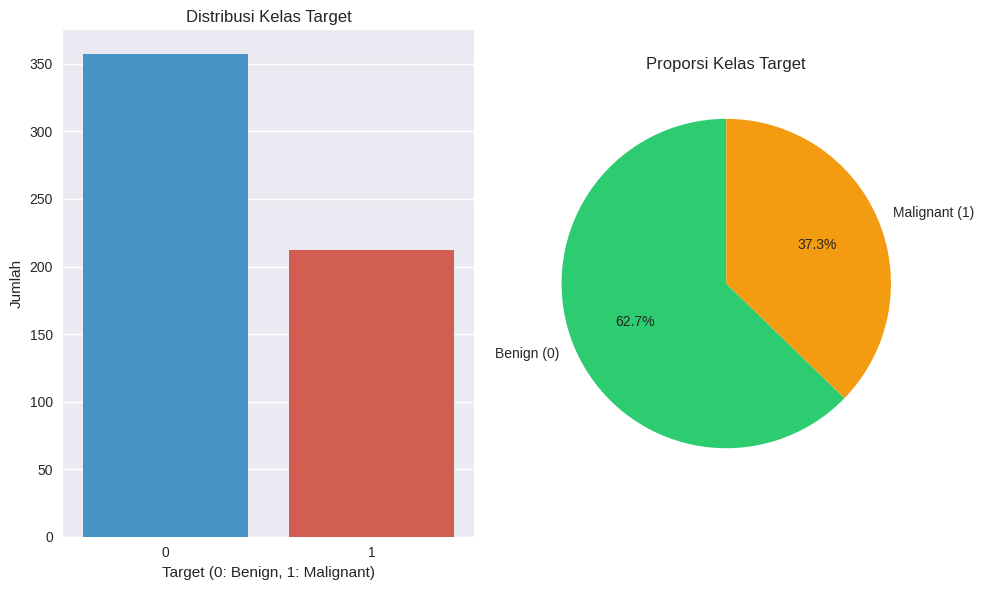

📊 Distribusi kelas:
   Benign: 357 sampel (62.7%)
   Malignant: 212 sampel (37.3%)


In [31]:
# Count plot distribusi target
plt.subplot(1, 2, 1)
if df[target_col].dtype == 'object':
    target_mapping = {'M': 1, 'B': 0} if 'M' in df[target_col].values else None
    if target_mapping:
        df[target_col] = df[target_col].map(target_mapping)

custom_colors = ['#3498db', '#e74c3c']  # Biru, Merah
sns.countplot(data=df, x=target_col, palette=custom_colors)
plt.title('Distribusi Kelas Target')
plt.xlabel('Target (0: Benign, 1: Malignant)')
plt.ylabel('Jumlah')

# Pie chart
plt.subplot(1, 2, 2)
target_counts = df[target_col].value_counts()
labels = ['Benign (0)', 'Malignant (1)']
pie_colors = ['#2ecc71', '#f39c12']  # Hijau, Oranye
plt.pie(target_counts.values, labels=labels, colors=pie_colors, autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Kelas Target')

plt.tight_layout()
plt.show()

print(f"📊 Distribusi kelas:")
for i, count in enumerate(target_counts):
    percentage = (count / len(df)) * 100
    label = 'Benign' if i == 0 else 'Malignant'
    print(f"   {label}: {count} sampel ({percentage:.1f}%)")


Gambar tersebut menampilkan dua visualisasi: sebuah *bar plot* yang memperlihatkan jumlah sampel per kelas, serta *pie chart* yang menggambarkan proporsi masing-masing kelas.

- **Jumlah Sampel:**  
  - Kelas **Benign (0)** memiliki **357 sampel**.  
  - Kelas **Malignant (1)** terdiri dari **212 sampel**.

- **Proporsi Kelas:**  
  - Kelas Benign (0) mencakup sekitar **62.7%** dari total data.  
  - Kelas Malignant (1) sekitar **37.3%** dari keseluruhan dataset.

Walaupun ada perbedaan jumlah sampel antara kelas, **ketidakseimbangan kelas ini tergolong moderat**. Dengan perbandingan sekitar 63% banding 37%, pada tahap awal pemodelan kami memutuskan untuk **tidak melakukan oversampling atau undersampling**.

Sebagai gantinya, kami akan menggunakan **metrik evaluasi yang lebih informatif**, seperti *Precision*, *Recall*, dan *F1-score*, yang dapat memberikan gambaran kinerja model lebih menyeluruh, khususnya dalam mendeteksi kelas minoritas (Malignant). Pendekatan ini penting agar model tetap sensitif dalam mengidentifikasi kasus Malignant meskipun jumlahnya lebih sedikit.

---

## 🔗 **Analisis Korelasi Fitur**

Analisis korelasi merupakan langkah penting untuk memahami hubungan antar fitur serta pengaruhnya terhadap variabel target. Tahap ini membantu dalam memilih fitur yang relevan dan meningkatkan interpretabilitas model.

**Tahapan Analisis:**
1. **Korelasi dengan Target**: Menghitung korelasi absolut tiap fitur numerik terhadap variabel target untuk mengetahui fitur paling berpengaruh  
2. **Korelasi Antar Fitur**: Memeriksa korelasi antar fitur guna mendeteksi multikolinearitas yang bisa merugikan model  
3. **Identifikasi Fitur Unggulan**: Memilih 10 fitur dengan korelasi tertinggi sebagai fokus analisis  
4. **Analisis Distribusi**: Membandingkan distribusi dua fitur teratas pada kelas target berbeda (benign vs malignant)

**Visualisasi yang Digunakan:**
- **Heatmap Korelasi**: Memvisualisasikan pola korelasi antara fitur unggulan dan target  
- **Bar Plot**: Memperingkatkan korelasi absolut fitur terhadap target  
- **Histogram Distribusi**: Menampilkan perbedaan sebaran nilai fitur untuk masing-masing kelas target

**Manfaat untuk Proses Modeling:**
- **Seleksi Fitur**: Memprioritaskan fitur dengan korelasi tinggi untuk meningkatkan performa model  
- **Deteksi Multikolinearitas**: Menghindari fitur yang saling berkorelasi sangat tinggi agar model lebih stabil  
- **Interpretasi Model**: Memahami faktor-faktor utama yang memengaruhi prediksi kanker

Jumlah fitur numerik: 31

Top 10 fitur dengan korelasi tertinggi terhadap target:
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis, dtype: float64


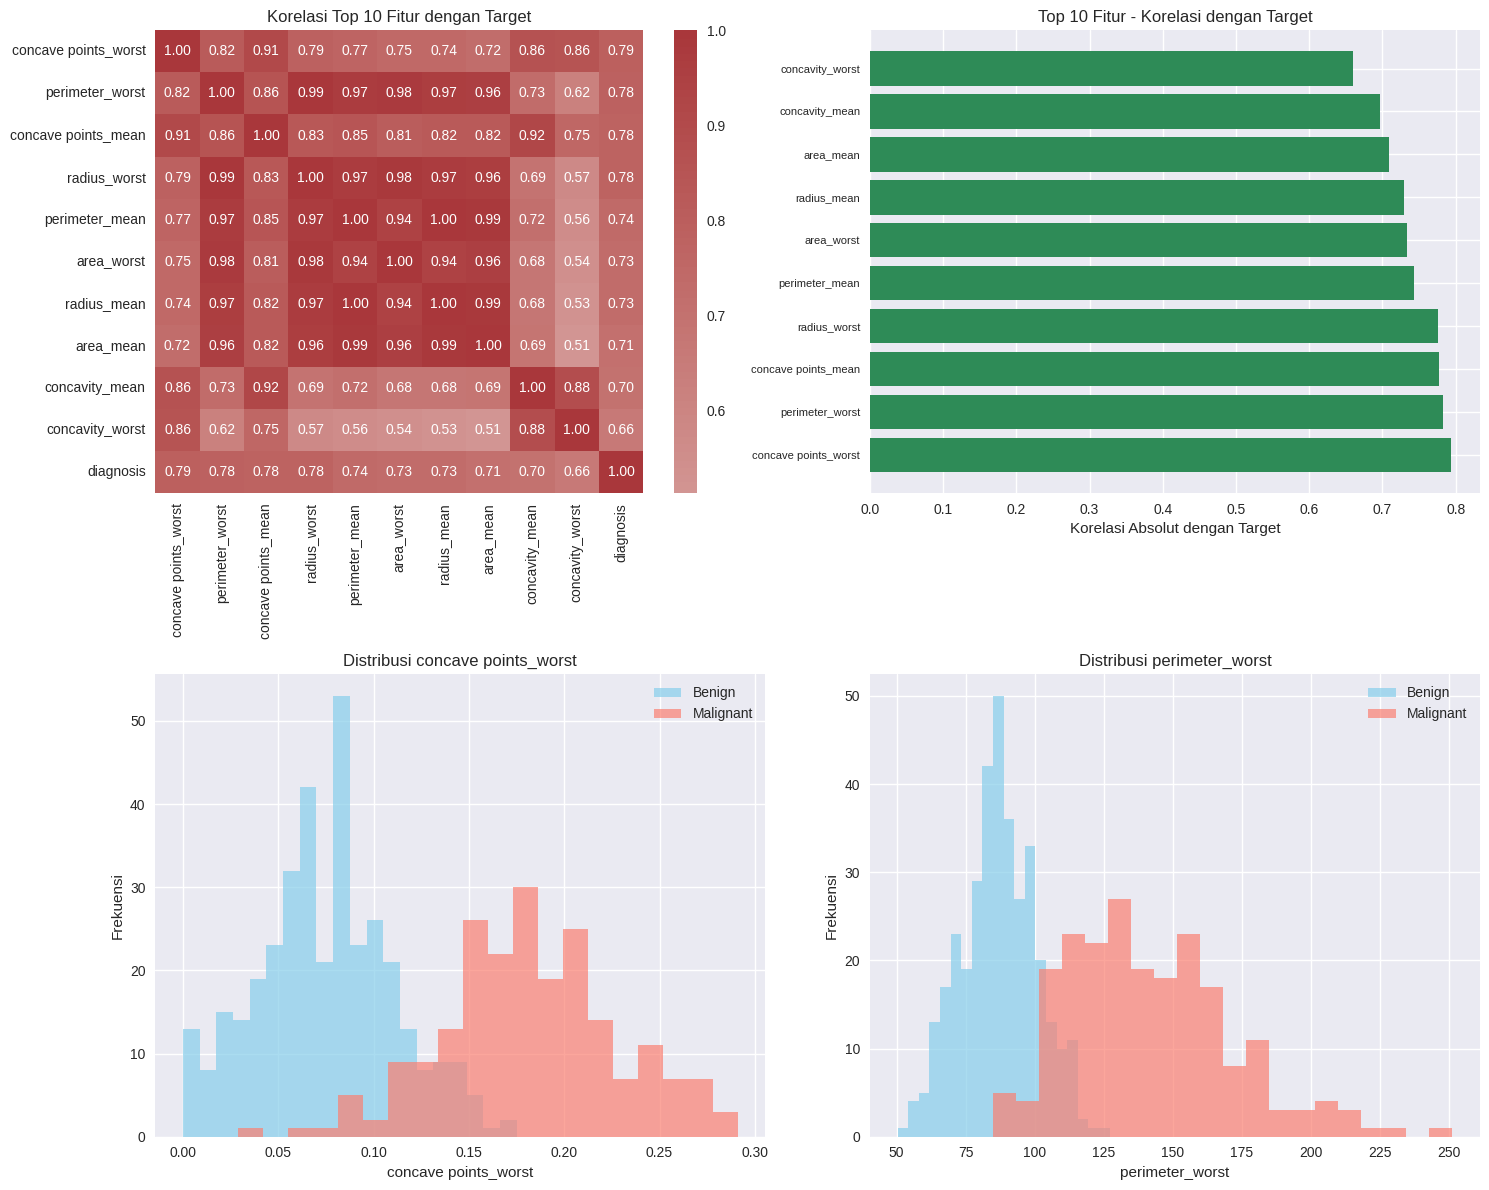

In [32]:
# Korelasi fitur numerik
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numeric_features:
    numeric_features.remove(target_col)

print(f"Jumlah fitur numerik: {len(numeric_features)}")

target_correlation = df[numeric_features + [target_col]].corr()[target_col].abs().sort_values(ascending=False)
print(f"\nTop 10 fitur dengan korelasi tertinggi terhadap target:")
print(target_correlation.head(11)[1:])

plt.figure(figsize=(15, 12))

# Heatmap dengan palet warna 'vlag' (biru-merah)
plt.subplot(2, 2, 1)
top_features = target_correlation.head(11)[1:11].index.tolist()
corr_matrix = df[top_features + [target_col]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='vlag', center=0, fmt='.2f')
plt.title('Korelasi Top 10 Fitur dengan Target')

# Bar plot korelasi dengan warna hijau
plt.subplot(2, 2, 2)
top_corr = target_correlation.head(11)[1:11]
plt.barh(range(len(top_corr)), top_corr.values, color='seagreen')
plt.yticks(range(len(top_corr)), top_corr.index, fontsize=8)
plt.xlabel('Korelasi Absolut dengan Target')
plt.title('Top 10 Fitur - Korelasi dengan Target')

# Histogram distribusi dengan warna berbeda untuk tiap kelas
top_2_features = target_correlation.head(3)[1:3].index.tolist()
colors = {0: 'skyblue', 1: 'salmon'}  # Benign: biru muda, Malignant: merah muda
labels = {0: 'Benign', 1: 'Malignant'}

for i, feature in enumerate(top_2_features):
    plt.subplot(2, 2, 3 + i)
    for target_val in sorted(df[target_col].unique()):
        data_subset = df[df[target_col] == target_val][feature]
        plt.hist(data_subset, alpha=0.7, label=labels[target_val], bins=20, color=colors[target_val])
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
    plt.title(f'Distribusi {feature}')
    plt.legend()

plt.tight_layout()
plt.show()

Setelah memahami distribusi kelas target, langkah berikutnya adalah melakukan analisis **korelasi antar fitur dan korelasi fitur terhadap variabel target**. Ini penting untuk mengidentifikasi fitur-fitur yang paling relevan dalam memprediksi diagnosis.

Dataset ini memiliki total **31 fitur numerik**. Saya menghitung koefisien korelasi Pearson antara setiap fitur dengan variabel target `diagnosis`.

- **Heatmap Korelasi:**  
  Dari heatmap korelasi, terlihat hubungan kuat antar fitur, terutama fitur yang berhubungan dengan ukuran dan bentuk sel seperti `radius`, `perimeter`, dan `area` (baik versi `_mean` maupun `_worst`). Hal ini menunjukkan adanya **multikolinearitas** yang umum dalam data medis, di mana pengukuran sel cenderung saling berkaitan.

- **10 Fitur dengan Korelasi Tertinggi terhadap Target:**  
  Berikut adalah sepuluh fitur dengan korelasi absolut tertinggi terhadap `diagnosis`:

  1.  `concave points_worst`: 0.793566  
  2.  `perimeter_worst`: 0.782914  
  3.  `concave points_mean`: 0.776614  
  4.  `radius_worst`: 0.776454  
  5.  `perimeter_mean`: 0.742636  
  6.  `area_worst`: 0.733825  
  7.  `radius_mean`: 0.730029  
  8.  `area_mean`: 0.708984  
  9.  `concavity_mean`: 0.696360  
  10. `concavity_worst`: 0.659610  

  Fitur-fitur dengan sufiks `_worst` yang merepresentasikan kondisi ekstrem sel cenderung memiliki korelasi sangat tinggi dengan diagnosis. Terutama, `concave points_worst` dan `perimeter_worst` berada di posisi teratas, menunjukkan nilai yang lebih tinggi pada fitur ini berkaitan dengan diagnosis Malignant.

- **Distribusi Fitur `concave points_worst` dan `perimeter_worst`:**  
  Histogram distribusi fitur ini menunjukkan bahwa nilai-nilai pada kelas Malignant (warna kuning keemasan) cenderung lebih tinggi dibandingkan kelas Benign (warna merah muda), menguatkan korelasi positif tersebut. Sel kanker biasanya memiliki nilai perimeter yang lebih besar dan bentuk sel yang lebih abnormal.

Secara keseluruhan, fitur-fitur yang menggambarkan ukuran dan bentuk sel, khususnya dalam kondisi ekstrem (`_worst`), merupakan **prediktor kuat** untuk diagnosis kanker payudara.

---

## ⚙️ **Tahap Preprocessing Data**

Preprocessing data adalah langkah penting untuk memastikan data siap dan sesuai bagi proses pelatihan model machine learning.

**Langkah-Langkah Utama:**
1. **Pisah Fitur dan Target**: Memisahkan variabel independen (fitur) dari variabel target  
2. **Pembagian Data**: Membagi dataset menjadi training dan testing set dengan rasio 80:20 menggunakan stratified sampling untuk menjaga proporsi kelas  
3. **Standardisasi Fitur**: Melakukan scaling fitur menggunakan StandardScaler agar fitur memiliki skala yang seragam  
4. **Verifikasi Distribusi Kelas**: Memastikan proporsi kelas target tetap konsisten di training dan testing set

**Alasan Pentingnya Standardisasi:**
- Banyak algoritma, seperti Logistic Regression, sangat bergantung pada skala fitur agar performa optimal  
- Standardisasi membantu proses konvergensi model berjalan lebih cepat dan stabil  
- Mencegah fitur dengan nilai besar mendominasi proses training, sehingga setiap fitur berkontribusi secara adil

**Manfaat Stratified Sampling:**
- Menjaga keseimbangan kelas yang sama antara training dan testing set  
- Membantu evaluasi model yang lebih akurat dan tidak bias karena distribusi kelas terjaga

In [33]:
print("🔧 PREPROCESSING DATA")
print("=" * 50)

# Pisah fitur dan target
X = df[numeric_features]
y = df[target_col]

print(f"Dimensi fitur (X): {X.shape}")
print(f"Dimensi target (y): {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData training: {X_train.shape}")
print(f"Data testing: {X_test.shape}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nStandarisasi selesai!")
print(f"Mean sebelum scaling (sample): {X_train.iloc[:, 0].mean():.3f}")
print(f"Mean setelah scaling (sample): {X_train_scaled[:, 0].mean():.3f}")
print(f"Std setelah scaling (sample): {X_train_scaled[:, 0].std():.3f}")

print(f"\nDistribusi kelas di training set:")
print(y_train.value_counts(normalize=True))
print(f"\nDistribusi kelas di testing set:")
print(y_test.value_counts(normalize=True))

🔧 PREPROCESSING DATA
Dimensi fitur (X): (569, 31)
Dimensi target (y): (569,)

Data training: (455, 31)
Data testing: (114, 31)

Standarisasi selesai!
Mean sebelum scaling (sample): 33056566.407
Mean setelah scaling (sample): -0.000
Std setelah scaling (sample): 1.000

Distribusi kelas di training set:
diagnosis
0    0.626374
1    0.373626
Name: proportion, dtype: float64

Distribusi kelas di testing set:
diagnosis
0    0.631579
1    0.368421
Name: proportion, dtype: float64


Dari hasil proses *preprocessing* data yang telah dilakukan, dapat disimpulkan beberapa hal penting berikut:

- **Dimensi Data:**  
  Setelah memisahkan fitur dan target, terdapat 31 fitur numerik untuk 569 sampel. Data terbagi menjadi 455 sampel untuk *training* dan 114 sampel untuk *testing*. Ukuran dataset ini cukup memadai untuk melatih dan menguji model.

- **Efektivitas Standarisasi:**  
  Proses standarisasi fitur berjalan dengan baik. Contohnya, nilai rata-rata fitur (misalnya kolom pertama) sudah mendekati 0 dan standar deviasi menjadi 1.000. Ini menandakan semua fitur numerik berada pada skala yang seragam, penting untuk performa optimal algoritma *machine learning*.

- **Preservasi Distribusi Kelas:**  
  Distribusi kelas pada set *training* dan *testing* tetap mirip dengan distribusi asli (sekitar 62.6% Benign dan 37.4% Malignant). Ini menunjukkan penggunaan strategi pembagian data dengan `stratify=y` berhasil menjaga proporsi kelas minoritas di kedua set, sehingga model dapat dilatih dan diuji dengan representasi yang baik dari kedua kelas.

Secara keseluruhan, **hasil *preprocessing* ini sangat baik dan menunjukkan data sudah dalam kondisi optimal** untuk tahap pemodelan *machine learning* berikutnya.

---

## 🤖 **Pelatihan Model Machine Learning**

Pada tahap ini, kita mengembangkan dan melatih tiga algoritma machine learning yang berbeda untuk menguji performa mereka dalam tugas klasifikasi kanker payudara.

**Algoritma yang Digunakan:**

### 1. **Logistic Regression**
- **Sifat**: Klasifikasi linear dengan output probabilitas  
- **Keunggulan**: Cepat, mudah diinterpretasi, sering dijadikan baseline  
- **Cocok untuk**: Data yang dapat dipisahkan secara linear dan analisis pentingnya fitur

### 2. **Decision Tree**
- **Sifat**: Klasifikasi berbasis aturan, mampu menangani hubungan non-linear  
- **Keunggulan**: Mudah dimengerti, efektif untuk pola kompleks dan interaksi fitur  
- **Cocok untuk**: Mendeteksi pola non-linear dan interaksi antar fitur

### 3. **Random Forest**
- **Sifat**: Metode ensemble yang menggabungkan banyak decision tree untuk mengurangi overfitting  
- **Keunggulan**: Lebih stabil, mampu menangani nilai hilang, menyediakan informasi penting fitur  
- **Cocok untuk**: Saat dibutuhkan akurasi tinggi dan variansi model yang rendah

**Strategi Pelatihan:**
- Menetapkan `random_state=42` untuk hasil yang konsisten dan dapat direproduksi  
- Melakukan tuning dasar pada hyperparameter seperti `max_iter`, `max_depth`, dan jumlah estimator  
- Siap untuk pengujian dengan teknik validasi silang di tahap selanjutnya

In [34]:
print("🤖 TRAINING MODEL MACHINE LEARNING")
print("=" * 50)

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

trained_models = {}
training_scores = {}

for name, model in models.items():
    print(f"\nMelatih {name}...")
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        train_pred = model.predict(X_train_scaled)
    else:
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)

    trained_models[name] = model
    training_scores[name] = accuracy_score(y_train, train_pred)

    print(f"{name} selesai dilatih!")
    print(f"Akurasi training: {training_scores[name]:.4f}")

print(f"\nSemua model berhasil dilatih!")

🤖 TRAINING MODEL MACHINE LEARNING

Melatih Logistic Regression...
Logistic Regression selesai dilatih!
Akurasi training: 0.9868

Melatih Decision Tree...
Decision Tree selesai dilatih!
Akurasi training: 1.0000

Melatih Random Forest...
Random Forest selesai dilatih!
Akurasi training: 1.0000

Semua model berhasil dilatih!


Setelah data siap, langkah berikutnya adalah melatih beberapa model *machine learning* untuk tugas klasifikasi ini. Kita melatih tiga model berbeda: *Logistic Regression*, *Decision Tree*, dan *Random Forest*.

Berikut hasil akurasi pada *training set* untuk masing-masing model:

- **Logistic Regression:**  
  Model ini mencapai **akurasi training sebesar 0.9868**. Nilai yang sangat tinggi ini menunjukkan *Logistic Regression* mampu menangkap pola dalam data training dengan sangat baik.

- **Decision Tree:**  
  Model *Decision Tree* menunjukkan **akurasi training sempurna, yaitu 1.0000**. Artinya, model berhasil mengklasifikasikan seluruh sampel training dengan benar.

- **Random Forest:**  
  Sama seperti *Decision Tree*, *Random Forest* juga meraih **akurasi training sempurna, 1.0000**. Ini menunjukkan ensemble dari pohon keputusan ini sangat efektif dalam "menghafal" data training.

**Observasi Penting:**  
Akurasi training yang sangat tinggi, terutama 100% untuk *Decision Tree* dan *Random Forest*, bisa menjadi **indikasi awal adanya *overfitting***. Artinya, model mungkin mempelajari data training beserta *noise*-nya, sehingga performanya bisa menurun pada data baru (testing).

Meski begitu, hasil ini menandakan semua model berhasil memahami hubungan dalam data training dengan baik. Langkah selanjutnya adalah mengevaluasi kinerja model pada data testing untuk mengukur kemampuan generalisasinya.

---

## 🔍 **Analisis Feature Importance**

Analisis feature importance memberikan pemahaman mendalam tentang seberapa besar pengaruh masing-masing fitur terhadap prediksi model. Ini penting untuk interpretasi model dan validasi klinis.

**Rincian Analisis:**

### **Feature Importance Berbasis Tree:**
- **Decision Tree:** Mengukur pentingnya fitur berdasarkan pengurangan impurity (Gini)
- **Random Forest:** Menghitung rata-rata pentingnya fitur dari seluruh pohon dalam ensemble
- **Makna:** Menilai kontribusi relatif fitur dalam pengambilan keputusan model

### **Signifikansi Klinis:**
- **Fitur Unggulan:** Menyoroti biomarker yang paling berpengaruh pada diagnosis
- **Validasi Medis:** Membandingkan dengan pengetahuan dan literatur klinis
- **Pengembangan Fitur:** Memberikan arahan untuk pembuatan fitur tambahan di masa depan

**Visualisasi:**
- Menggunakan diagram batang horizontal untuk kemudahan pembacaan
- Fokus pada 15 fitur teratas agar lebih jelas
- Perbandingan antara dua algoritma untuk insight yang komprehensif

**Manfaat bagi Praktisi Medis:**
- Mengidentifikasi fitur-fitur kunci dalam proses diagnosis
- Mendukung validasi berdasarkan domain medis
- Memberikan panduan fokus pemeriksaan klinis berdasarkan fitur penting

🔍 ANALISIS FEATURE IMPORTANCE

Top 10 Feature Importance - Decision Tree:
   perimeter_worst: 0.7232
   concave points_worst: 0.0677
   smoothness_worst: 0.0408
   texture_mean: 0.0292
   area_mean: 0.0225
   texture_worst: 0.0187
   area_worst: 0.0156
   concavity_worst: 0.0143
   fractal_dimension_worst: 0.0134
   texture_se: 0.0125

Top 10 Feature Importance - Random Forest:
   area_worst: 0.1310
   perimeter_worst: 0.1303
   concave points_worst: 0.1032
   radius_worst: 0.0978
   concave points_mean: 0.0874
   area_mean: 0.0584
   perimeter_mean: 0.0484
   concavity_worst: 0.0478
   area_se: 0.0419
   concavity_mean: 0.0366


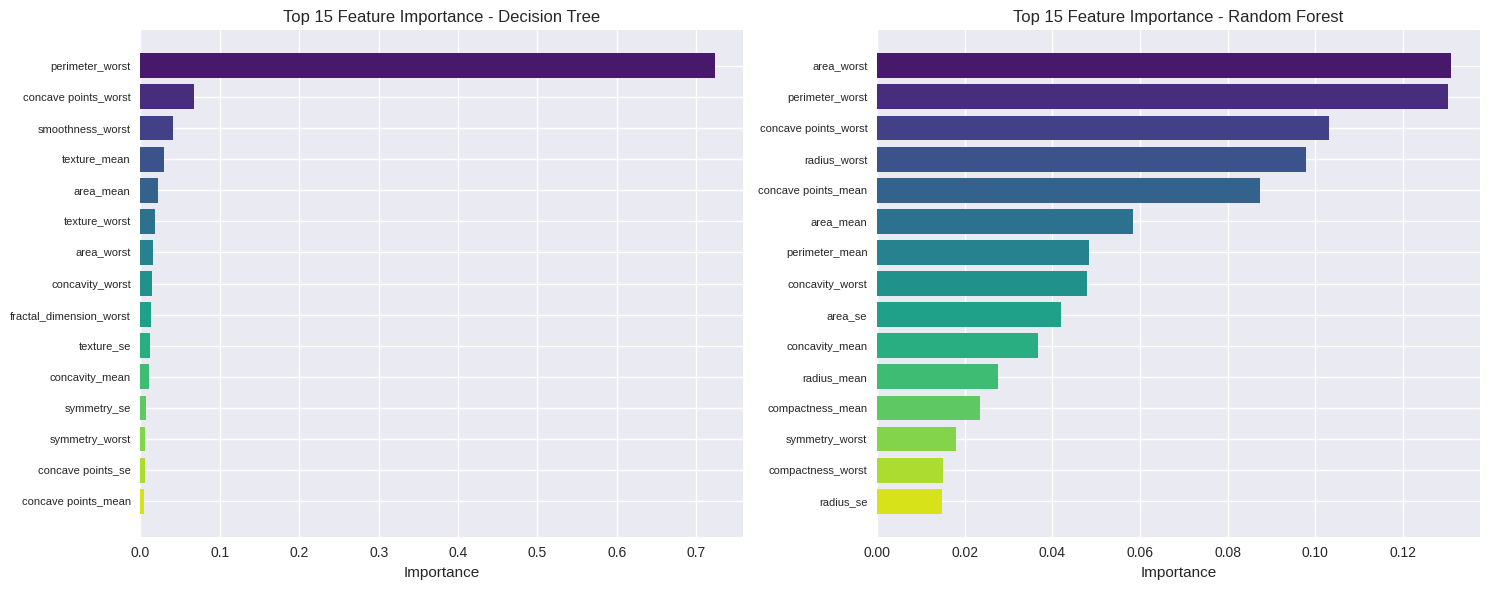

In [35]:
print("🔍 ANALISIS FEATURE IMPORTANCE")
print("=" * 50)

tree_models = ['Decision Tree', 'Random Forest']

plt.figure(figsize=(15, 6))

for i, model_name in enumerate(tree_models):
    model = trained_models[model_name]
    feature_importance = model.feature_importances_

    importance_df = pd.DataFrame({
        'feature': numeric_features,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)

    plt.subplot(1, 2, i + 1)
    top_features = importance_df.head(15)

    # Gunakan palet warna dari seaborn (viridis)
    colors = sns.color_palette("viridis", len(top_features))

    plt.barh(range(len(top_features)), top_features['importance'], color=colors)
    plt.yticks(range(len(top_features)), top_features['feature'], fontsize=8)
    plt.xlabel('Importance')
    plt.title(f'Top 15 Feature Importance - {model_name}')
    plt.gca().invert_yaxis()

    print(f"\nTop 10 Feature Importance - {model_name}:")
    for idx, row in top_features.head(10).iterrows():
        print(f"   {row['feature']}: {row['importance']:.4f}")

plt.tight_layout()
plt.show()

Setelah model-model berhasil dilatih, langkah berikutnya adalah menganalisis **feature importance** untuk mengetahui fitur mana yang paling berpengaruh dalam pengambilan keputusan model. Analisis ini penting untuk interpretabilitas model sekaligus validasi klinis.

### Feature Importance pada Model Decision Tree:

- **perimeter_worst (72.32%)**  
  Fitur ini mendominasi secara signifikan dalam klasifikasi Decision Tree, menandakan bahwa keliling area terburuk dari massa tumor adalah faktor utama dalam membedakan tumor jinak dan ganas.

- **concave points_worst (6.77%)**  
  Jumlah titik cekung terburuk, mencerminkan kompleksitas bentuk tumor, menjadi fitur penting kedua.

- **smoothness_worst (4.08%)**  
  Tingkat kehalusan permukaan tumor dalam kondisi terburuk juga berkontribusi signifikan.

- **Fitur lain**  
  Sisa fitur memiliki kontribusi kecil (< 3% masing-masing).

### Feature Importance pada Model Random Forest:

- **area_worst (13.10%)**  
  Area terburuk menjadi fitur terpenting, menunjukkan ukuran tumor sangat krusial.

- **perimeter_worst (13.03%)**  
  Hampir setara dengan area_worst, mengonfirmasi pentingnya dimensi geometris tumor.

- **concave points_worst (10.32%)**  
  Konsisten dengan Decision Tree, fitur ini tetap masuk top 3.

- **radius_worst (9.78%)**  
  Radius terburuk melengkapi informasi dimensi tumor.

- **concave points_mean (8.74%)**  
  Rata-rata titik cekung juga memberikan kontribusi signifikan.

---

### Perbedaan Strategi Model:

1. **Decision Tree:**  
   Mengandalkan **"single dominant feature strategy"** dengan perimeter_worst sebagai splitter utama. Ini menunjukkan satu fitur geometris sudah cukup untuk klasifikasi akurat.

2. **Random Forest:**  
   Menggunakan **"ensemble wisdom approach"** yang menggabungkan informasi dari banyak fitur secara lebih seimbang. Pendekatan ini lebih robust dan komprehensif.

---

### Validasi Medis:

Hasil feature importance ini sangat sesuai dengan literatur medis:

- **Fitur Geometris (area, perimeter, radius):**  
  Ukuran tumor memang indikator kuat keganasan, di mana tumor ganas cenderung lebih besar dan bentuknya tidak beraturan.

- **Concave Points:**  
  Titik cekung mencerminkan **irregularitas bentuk** tumor, yang biasanya lebih kompleks pada tumor ganas.

- **Dominasi Fitur "Worst":**  
  Fitur dengan nilai ekstrem (_worst_) lebih andal dalam membedakan keganasan, karena karakteristik ekstrem seringkali lebih mencolok.

---

### Implikasi untuk Diagnosis Klinis:

1. **Fokus Pemeriksaan:**  
   Praktisi medis perlu menitikberatkan pada pengukuran dimensi tumor (area, perimeter, radius) dan analisis bentuk (concave points).

2. **Teknologi Imaging:**  
   Dukungan pada teknologi imaging yang mampu mengukur parameter geometris dengan presisi tinggi.

3. **Standardisasi:**  
   Pentingnya standardisasi pengukuran fitur "worst" untuk memastikan konsistensi diagnosis.

---

### Kesimpulan:

- **Random Forest** menunjukkan pendekatan yang **lebih robust** karena:  
  - Tidak terlalu bergantung pada satu fitur saja  
  - Menggabungkan banyak perspektif fitur  
  - Lebih tahan terhadap noise dan outlier  
  - Distribusi feature importance yang lebih natural

- **Decision Tree**, meskipun akurat, memiliki potensi **keterbatasan** karena terlalu mengandalkan satu fitur utama.

Analisis ini mengonfirmasi bahwa **karakteristik geometris tumor, terutama nilai ekstremnya, merupakan biomarker sangat kuat untuk diagnosis kanker payudara**. Temuan ini memberikan kepercayaan tinggi terhadap validitas model dan relevansi klinisnya.

---

## 📊 **Evaluasi Model**

Evaluasi model adalah tahap penting untuk mengukur performa dan menentukan model terbaik berdasarkan berbagai metrik. Pada bagian ini, kita memakai beberapa metrik untuk mendapatkan gambaran performa yang komprehensif.

### Metrik Evaluasi yang Digunakan:

1. **Accuracy**
   - **Pengertian**: Rasio prediksi yang benar dibanding total prediksi.
   - **Fungsi**: Menilai tingkat keseluruhan kebenaran model.
   - **Sesuai untuk**: Dataset yang seimbang.

2. **Precision**
   - **Pengertian**: Perbandingan antara True Positive dengan total prediksi positif.
   - **Fungsi**: Mengukur ketepatan prediksi positif.
   - **Penting di**: Konteks medis untuk mengurangi false alarm.

3. **Recall (Sensitivity)**
   - **Pengertian**: Perbandingan antara True Positive dengan total kasus positif sebenarnya.
   - **Fungsi**: Kemampuan model mendeteksi semua kasus positif.
   - **Kritikal untuk**: Diagnosis medis agar semua kasus malignan teridentifikasi.

4. **F1-Score**
   - **Pengertian**: Rata-rata harmonis antara precision dan recall.
   - **Fungsi**: Menyeimbangkan antara precision dan recall.
   - **Optimal untuk**: Evaluasi pada dataset yang tidak seimbang.

### Pendekatan Analisis:

- Menggunakan **classification report** untuk metrik detail per kelas.
- Melakukan **perbandingan performa** antar model secara langsung.
- Menentukan **model terbaik**

In [36]:
print("📊 EVALUASI MODEL")
print("=" * 50)

evaluation_results = {}

for name, model in trained_models.items():
    print(f"\nEvaluasi {name}:")
    print("-" * 30)

    if name == 'Logistic Regression':
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    evaluation_results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    print(f"Akurasi: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

print(f"\n📊 PERBANDINGAN MODEL")
print("=" * 50)

comparison_df = pd.DataFrame(evaluation_results).T
comparison_df = comparison_df[['accuracy', 'precision', 'recall', 'f1_score']].round(4)
print(comparison_df)

best_model_name = comparison_df['accuracy'].idxmax()
best_accuracy = comparison_df.loc[best_model_name, 'accuracy']
print(f"\nModel terbaik: {best_model_name}")
print(f"Akurasi terbaik: {best_accuracy:.4f}")

📊 EVALUASI MODEL

Evaluasi Logistic Regression:
------------------------------
Akurasi: 0.9649
Precision: 0.9750
Recall: 0.9286
F1-Score: 0.9512

Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        72
   Malignant       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Evaluasi Decision Tree:
------------------------------
Akurasi: 0.9211
Precision: 0.9024
Recall: 0.8810
F1-Score: 0.8916

Classification Report:
              precision    recall  f1-score   support

      Benign       0.93      0.94      0.94        72
   Malignant       0.90      0.88      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114


Evaluasi Random Forest:
------

| Model               | Akurasi | Precision | Recall  | F1-Score |
| :------------------ | :------ | :-------- | :------ | :------- |
| Logistic Regression | 0.9649  | 0.9750    | 0.9286  | 0.9512   |
| Decision Tree       | 0.9211  | 0.9024    | 0.8810  | 0.8916   |
| Random Forest       | 0.9561  | 1.0000    | 0.8810  | 0.9367   |

Berdasarkan nilai akurasi, **Logistic Regression tampil sebagai model terbaik** dengan akurasi tertinggi sebesar 0.9649.

Namun, jika kita meninjau performa secara menyeluruh—terutama dalam konteks diagnosis medis di mana konsekuensi *false positives* dan *false negatives* berbeda secara signifikan—beberapa hal penting perlu diperhatikan:

- **Logistic Regression** menunjukkan keseimbangan yang sangat baik antara *Precision* dan *Recall* pada kelas Malignant, sekaligus mempertahankan akurasi keseluruhan tertinggi. Ini mengindikasikan bahwa model ini efektif dalam mendeteksi sekaligus mengonfirmasi kasus Malignant dengan baik.

- **Random Forest** memiliki *Precision* sempurna (1.0000) untuk kelas Malignant, yang berarti setiap prediksi "Malignant" sangat dapat dipercaya. Hal ini sangat berguna jika biaya kesalahan positif palsu (*false positive*) sangat tinggi. Namun, *Recall* model ini sedikit lebih rendah dibanding Logistic Regression.

**Secara umum, ketiga model menunjukkan performa yang sangat baik** dalam tugas klasifikasi ini. Pilihan model terbaik akhirnya bergantung pada prioritas yang ingin diutamakan: apakah mengutamakan akurasi keseluruhan, meminimalkan *false positives* (Precision tinggi), atau meminimalkan *false negatives* (Recall tinggi) pada kelas Malignant. Dengan keseimbangan metrik yang dimiliki, **Logistic Regression merupakan pilihan yang sangat baik dan seimbang**.

---

## 🎯 **Visualisasi Confusion Matrix**

Confusion matrix memberikan gambaran rinci tentang pola kesalahan yang dibuat oleh setiap model. Visualisasi ini sangat berguna untuk memahami bagaimana model berperforma pada setiap kelas.

### Komponen dalam Confusion Matrix:
- **True Negatives (TN)**: Prediksi Benign yang benar
- **False Positives (FP)**: Kesalahan tipe I (false alarm)
- **False Negatives (FN)**: Kesalahan tipe II (tidak terdeteksi)
- **True Positives (TP)**: Prediksi Malignant yang benar

### Implikasi dalam Konteks Medis:
- **FP (False Alarm)**: Dapat menyebabkan kecemasan pasien dan prosedur yang tidak perlu
- **FN (Missed Detection)**: Dapat mengakibatkan diagnosis terlewat dan penanganan yang terlambat (sangat kritikal)
- **Keseimbangan**: Harus menyeimbangkan antara false alarm dan missed cases

### Visualisasi Perbandingan:
- Menggunakan heatmap untuk tiap model
- Menampilkan akurasi pada judul plot
- Pewarnaan yang memudahkan interpretasi visual

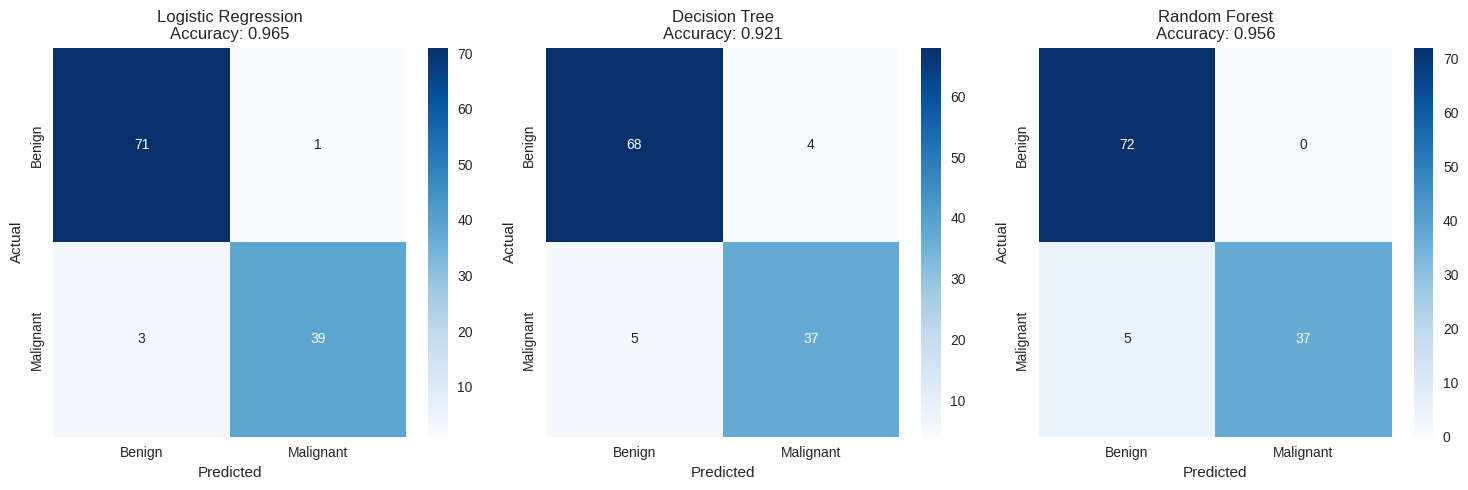


🔍 Analisis Confusion Matrix - Logistic Regression:
True Negatives (TN): 71
False Positives (FP): 1
False Negatives (FN): 3
True Positives (TP): 39

📊 Interpretasi:
• Correctly predicted Benign: 71
• Incorrectly predicted Malignant (Type I Error): 1
• Incorrectly predicted Benign (Type II Error): 3
• Correctly predicted Malignant: 39


In [37]:
plt.figure(figsize=(15, 5))

for i, (name, results) in enumerate(evaluation_results.items()):
    plt.subplot(1, 3, i + 1)

    cm = confusion_matrix(y_test, results['predictions'])

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Benign', 'Malignant'],
                yticklabels=['Benign', 'Malignant'])

    plt.title(f'{name}\nAccuracy: {results["accuracy"]:.3f}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

print(f"\n🔍 Analisis Confusion Matrix - {best_model_name}:")
best_cm = confusion_matrix(y_test, evaluation_results[best_model_name]['predictions'])
tn, fp, fn, tp = best_cm.ravel()

print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

print(f"\n📊 Interpretasi:")
print(f"• Correctly predicted Benign: {tn}")
print(f"• Incorrectly predicted Malignant (Type I Error): {fp}")
print(f"• Incorrectly predicted Benign (Type II Error): {fn}")
print(f"• Correctly predicted Malignant: {tp}")

**Confusion matrix** memberikan gambaran jelas mengenai jenis kesalahan yang dilakukan oleh masing-masing model:

- **Logistic Regression (Akurasi: 0.965):** Model ini menunjukkan keseimbangan yang sangat baik dengan hanya **1 False Positive** (pasien Benign diprediksi Malignant) dan **3 False Negatives** (pasien Malignant diprediksi Benign). Hal ini menandakan kinerja yang andal dengan tingkat kesalahan yang rendah.

- **Decision Tree (Akurasi: 0.921):** Model ini memiliki performa yang lebih rendah dibandingkan yang lain, dengan **4 False Positives** dan **5 False Negatives**. Jumlah kesalahan yang lebih banyak ini memperkuat indikasi *overfitting* yang sudah terlihat dari akurasi training yang sempurna.

- **Random Forest (Akurasi: 0.956):** Model ini menarik karena tidak memiliki **False Positives sama sekali**, artinya tidak ada pasien sehat yang salah didiagnosis sakit. Namun, terdapat **5 False Negatives**, sehingga beberapa kasus Malignant tidak terdeteksi.

**Kesimpulan:**  
*Logistic Regression* unggul dalam hal keseimbangan dan minimnya kesalahan total. Sementara itu, *Random Forest* lebih baik dalam menghindari *False Positives*, yang sangat krusial dalam konteks diagnosis medis, meskipun harus mengorbankan sedikit peningkatan *False Negatives* dibandingkan Logistic Regression.

---

## 📊 Visualisasi Kurva ROC (Receiver Operating Characteristic)

Kurva ROC dan nilai AUC (Area Under the Curve) memberikan gambaran menyeluruh tentang performa model tanpa bergantung pada threshold tertentu.

### Interpretasi Kurva ROC:
- **Sumbu X:** False Positive Rate (1 - Spesifisitas)
- **Sumbu Y:** True Positive Rate (Sensitivitas / Recall)
- **Model Ideal:** Kurva mendekati sudut kiri atas grafik
- **Model Acak:** Garis diagonal dari kiri bawah ke kanan atas (AUC = 0.5)

### Makna Nilai AUC:
- **AUC = 1.0:** Model sempurna
- **AUC 0.9 - 1.0:** Performa sangat baik
- **AUC 0.8 - 0.9:** Performa baik
- **AUC 0.7 - 0.8:** Performa sedang
- **AUC < 0.7:** Performa kurang memuaskan

### Visualisasi Perbandingan:
- Beberapa kurva ROC dalam satu plot untuk membandingkan model
- Label AUC untuk evaluasi objektif
- Diagram batang untuk membandingkan metrik performa (akurasi, presisi, recall, F1-score)

### Kegunaan Klinis:
Analisis ROC sangat penting dalam diagnosis medis untuk menentukan threshold optimal dengan mempertimbangkan trade-off sensitivitas dan spesifisitas berdasarkan risiko klinis.

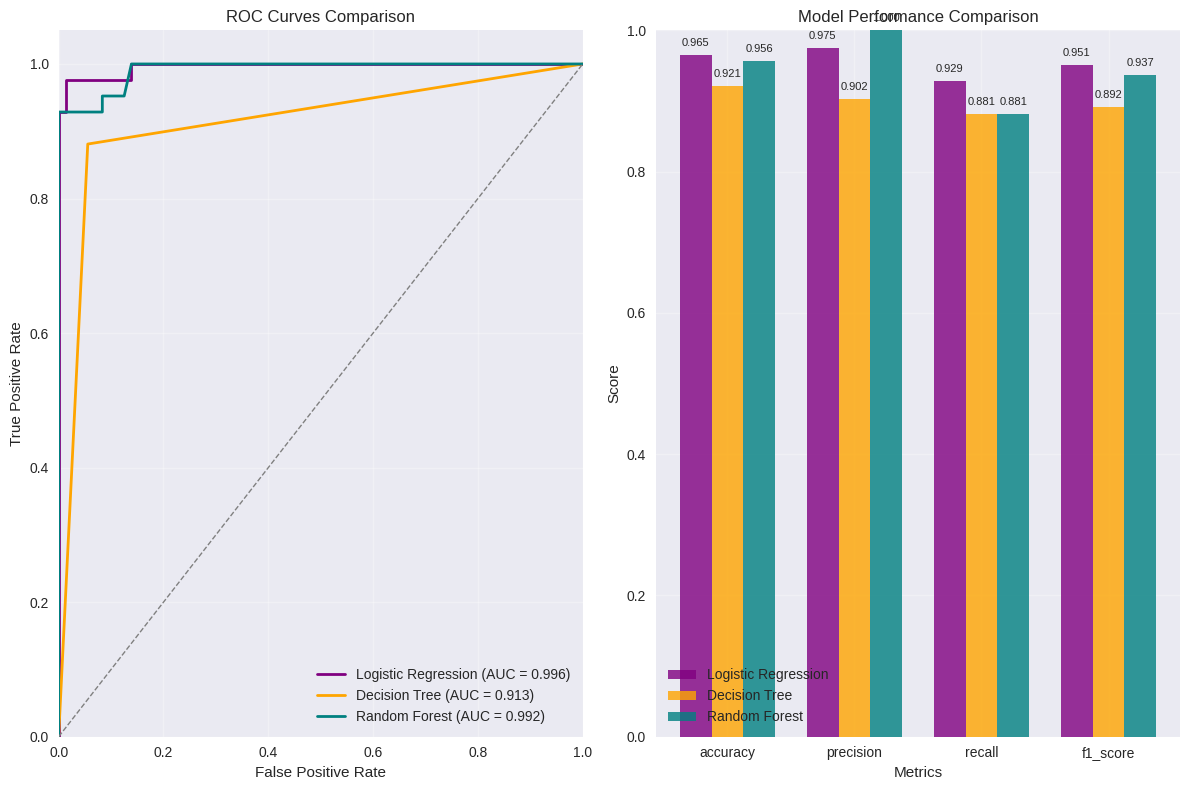

In [38]:
plt.figure(figsize=(12, 8))

colors = ['purple', 'orange', 'teal']  # ganti warna di sini
plt.subplot(1, 2, 1)

for i, (name, results) in enumerate(evaluation_results.items()):
    fpr, tpr, _ = roc_curve(y_test, results['probabilities'])
    auc_score = auc(fpr, tpr)

    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f'{name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
x = np.arange(len(metrics))
width = 0.25

for i, (name, results) in enumerate(evaluation_results.items()):
    values = [results[metric] for metric in metrics]
    plt.bar(x + i * width, values, width, label=name, color=colors[i], alpha=0.8)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x + width, metrics)
plt.legend()
plt.ylim([0, 1])
plt.grid(True, alpha=0.3)

for i, (name, results) in enumerate(evaluation_results.items()):
    values = [results[metric] for metric in metrics]
    for j, v in enumerate(values):
        plt.text(j + i * width, v + 0.01, f'{v:.3f}',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

Terakhir, kita akan membahas **ROC Curve (Receiver Operating Characteristic Curve)**, yang merupakan alat visual penting untuk menilai performa model klasifikasi biner dalam membedakan kelas positif dan negatif. Selain itu, kita juga menampilkan ringkasan visual metrik performa model yang sudah dihitung.

### 1. Perbandingan ROC Curve (Bagian Kiri)

- **Pengertian ROC Curve:** ROC Curve menggambarkan kemampuan model dalam membedakan antara kelas positif dan negatif pada berbagai ambang (*threshold*) klasifikasi. Kurva yang mendekati sudut kiri atas menunjukkan performa model yang lebih baik.
- **Area Under the Curve (AUC):** AUC mengukur kualitas keseluruhan dari kemampuan diskriminasi model, dengan nilai antara 0 sampai 1. Nilai yang mendekati 1 menandakan model yang sangat baik.
    - **Logistic Regression (AUC = 0.996):** Kurva berwarna biru dari model ini paling dekat dengan sudut kiri atas dan memiliki nilai AUC tertinggi, menandakan kemampuan yang sangat kuat dalam membedakan antara diagnosis Benign dan Malignant.
    - **Random Forest (AUC = 0.992):** Kurva hijau juga menunjukkan performa yang hampir setara dan sangat baik, sangat mendekati Logistic Regression.
    - **Decision Tree (AUC = 0.913):** Kurva merah berada di bawah kedua model lainnya, menandakan kemampuan diskriminasi yang paling rendah di antara ketiganya, meskipun masih lebih baik daripada tebakan acak.

**Singkatnya:** Logistic Regression dan Random Forest sama-sama memiliki kemampuan diskriminasi yang sangat baik, dengan Logistic Regression sedikit lebih unggul berdasarkan nilai AUC.

### 2. Perbandingan Performa Model (Bagian Kanan)

- Grafik batang ini memperlihatkan perbandingan metrik `accuracy`, `precision`, `recall`, dan `f1_score` pada data *testing* untuk ketiga model.
- **Akurasi:**
    - Logistic Regression memiliki akurasi tertinggi (`0.965`), sedikit mengungguli Random Forest (`0.956`).
    - Decision Tree memiliki akurasi terendah (`0.921`).
- **Precision:**
    - Random Forest sempurna dengan nilai `1.000`, menegaskan tidak adanya *False Positive*.
    - Logistic Regression juga sangat baik (`0.975`).
    - Decision Tree lebih rendah (`0.902`).
- **Recall:**
    - Logistic Regression unggul dengan `0.929`, menunjukkan kemampuan terbaik dalam menangkap kasus Malignant.
    - Random Forest dan Decision Tree sama-sama memiliki recall `0.881`.
- **F1-Score:**
    - Logistic Regression memimpin dengan skor `0.951`, menunjukkan keseimbangan terbaik antara precision dan recall.
    - Random Forest juga kuat di `0.937`, didukung oleh precision sempurnanya.
    - Decision Tree berada di posisi terbawah dengan nilai `0.892`.

---

## **Kesimpulan Akhir:**

Visualisasi ini semakin menguatkan hasil evaluasi yang telah kita lakukan sebelumnya.

* **Logistic Regression** terus menunjukkan performa yang kuat dan seimbang di berbagai metrik, dengan nilai AUC dan *Recall* tertinggi, sehingga menjadi pilihan yang sangat andal.
* **Random Forest** juga menunjukkan hasil yang sangat baik, khususnya dengan *Precision* sempurna (tanpa *False Positives*), yang sangat penting dalam aplikasi medis. Namun, *Recall*-nya sedikit di bawah Logistic Regression.
* **Decision Tree** tampil lebih rendah dibanding kedua model lainnya di semua metrik, menandakan model ini kurang mampu melakukan generalisasi pada data baru.

Dari analisis menyeluruh ini, **Logistic Regression dan Random Forest merupakan model terbaik dan paling potensial** untuk tugas klasifikasi diagnosis kanker payudara.